In [1]:
from face2anime.pipelines.facial_landmark import SimpleFacialLandmarkPipeline

pipe = SimpleFacialLandmarkPipeline(
    './hrnetv2.py',
    'https://github.com/hysts/anime-face-detector/releases/download/v0.0.1/mmpose_anime-face_hrnetv2.pth',
    device='cuda:0'
)

Loads checkpoint by http backend from path: https://github.com/hysts/anime-face-detector/releases/download/v0.0.1/mmpose_anime-face_hrnetv2.pth


In [2]:
hpp = SimpleFacialLandmarkPipeline(
    './hrnet_w18_awing.py',
    'https://download.openmmlab.com/mmpose/face/hrnetv2/hrnetv2_w18_wflw_256x256_awing-5af5055c_20211212.pth',
    device='cuda:0'
)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/face/hrnetv2/hrnetv2_w18_wflw_256x256_awing-5af5055c_20211212.pth


/home/vinhpt/.conda/envs/hoang/lib/python3.10/site-packages/mmpose/datasets/datasets/utils.py:102: UserWarning: The metainfo config file "configs/_base_/datasets/wflw.py" does not exist. A matched config file "/home/vinhpt/.conda/envs/hoang/lib/python3.10/site-packages/mmpose/.mim/configs/_base_/datasets/wflw.py" will be used instead.
  warnings.warn(


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from torchvision.transforms.functional import to_tensor

def predict_and_plot(pipe: SimpleFacialLandmarkPipeline, impath: str):
    img = np.asarray(Image.open(impath))
    inp = to_tensor(img)
    res = pipe.predict(inp)

    plt.imshow(img)
    for i, k in enumerate(res['keypoints']):
        plt.plot(k[0], k[1], 'r.')
        plt.text(int(k[0]), int(k[1]), str(i), fontsize=5)

In [4]:
hm = pipe('../data/face_cartoon/pa_face/000000.jpg')

In [8]:
hm[0]

tensor([[[ 8.6576e-05,  8.6576e-05,  8.6576e-05,  ...,  8.7635e-05,
           2.4332e-04,  1.8009e-04],
         [ 1.1309e-04, -2.0161e-04,  1.4372e-04,  ...,  8.6576e-05,
           1.7494e-04,  1.8050e-04],
         [-1.1447e-03, -1.4436e-03,  1.0126e-04,  ...,  8.6576e-05,
           8.6878e-05,  1.2365e-04],
         ...,
         [-3.6468e-04, -6.0383e-04, -1.5756e-04,  ...,  1.2425e-04,
           2.4905e-05,  3.7198e-04],
         [-2.0841e-04, -4.1729e-05,  3.7056e-04,  ...,  6.7991e-04,
           1.2992e-03,  1.4786e-03],
         [ 8.6576e-05,  2.2021e-04,  8.6576e-05,  ..., -2.1220e-04,
           5.9240e-04,  2.1663e-04]],

        [[ 2.5613e-06,  2.5613e-06,  2.5613e-06,  ...,  8.5091e-07,
           2.4553e-04,  4.0469e-04],
         [ 2.5166e-04, -1.0073e-03, -3.8953e-04,  ...,  2.5613e-06,
          -1.5648e-04, -1.9712e-04],
         [ 1.1699e-04, -7.6985e-04, -3.1283e-04,  ...,  2.5613e-06,
           2.2502e-05,  7.3921e-04],
         ...,
         [-1.8150e-03, -1

/home/vinhpt/.conda/envs/hoang/lib/python3.10/site-packages/torchvision/transforms/functional.py:152: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at ../torch/csrc/utils/tensor_numpy.cpp:206.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


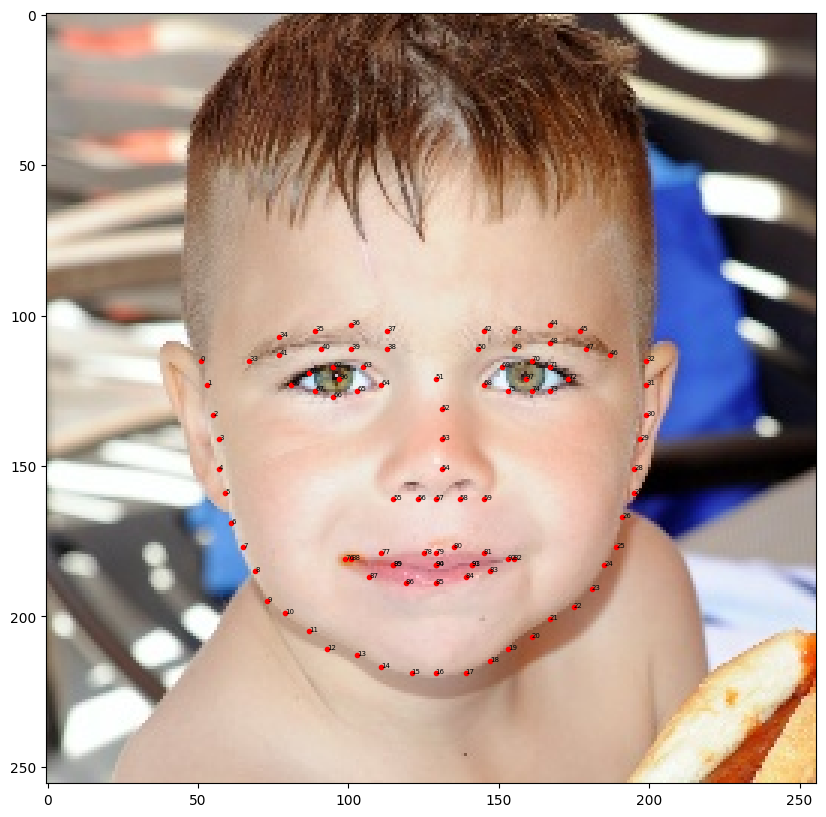

In [5]:
plt.figure(figsize=(10, 10))
predict_and_plot(hpp, '../data/face_photo/00050.jpg')

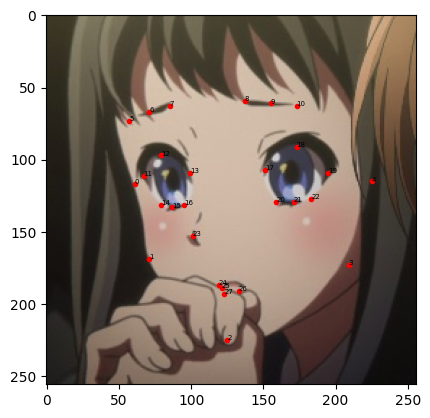

In [6]:
predict_and_plot(pipe, '../data/face_cartoon/kyoto_face/000033.jpg')